In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy

Found 201 images belonging to 3 classes.
Found 13 images belonging to 3 classes.


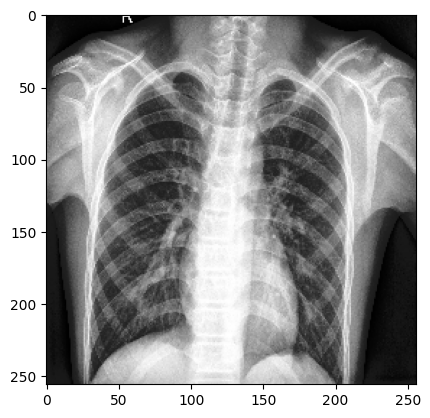

In [2]:
# load and augment data
train_dir = '/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/train'
test_dir = '/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test'

# normalize pixel values and rotate, shift, zoom, flip images to increase diversity
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
    # rotation_range=20,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    # shear_range=0.2,
    # zoom_range=0.2,
    # horizontal_flip=True
)
train = img_gen.flow_from_directory(
    train_dir,
    target_size = (256, 256), # 256x256
    batch_size = 32, 
    class_mode = 'categorical', # multi-class classification
    subset = 'training'
)
test = img_gen.flow_from_directory(
    test_dir,
    target_size = (256, 256), # 256x256
    batch_size = 32, 
    class_mode = 'categorical', # multi-class classification
    subset = 'validation'
)
xrays, labels = train[0]
plt.imshow(xrays[0])
plt.show()

In [3]:
print(xrays[0].shape, labels[0].shape)

(256, 256, 3) (3,)


In [115]:
# building CNN model, trying 3 convolutional layers, 1 dense layer, 1 output layer

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# loss function: multi-class classification -> multi-class crossentropy
# optimizer: adam
# learning rate: 0.001 (small dataset)
# activation function: relu (hidden layers), sigmoid or softmax (output layer)
# metrics: accuracy

model = Sequential()

# convolutional layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))

# convolutional layer 2
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))

# convolutional layer 3
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D(2, 2))

# flattening to feed into dense layer
model.add(Flatten())

# dense layer
model.add(Dense(128, activation='relu'))

# output layer
model.add(Dense(3, activation='sigmoid'))

optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,839,363 (56.61 MB)

 Trainable params: 14,839,363 (56.61 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
# trying with 10 epochs
model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 782ms/step - accuracy: 0.3502 - loss: 1.8855 - val_accuracy: 0.5385 - val_loss: 1.0432
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 630ms/step - accuracy: 0.7821 - loss: 0.9293 - val_accuracy: 0.6923 - val_loss: 0.7120
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step - accuracy: 0.9045 - loss: 0.4494 - val_accuracy: 0.6923 - val_loss: 0.4365
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 551ms/step - accuracy: 0.8913 - loss: 0.2835 - val_accuracy: 0.7692 - val_loss: 0.5321
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - accuracy: 0.9221 - loss: 0.1762 - val_accuracy: 0.7692 - val_loss: 0.3642
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 667ms/step - accuracy: 0.9559 - loss: 0.1445 - val_accuracy: 0.8462 - val_loss: 0.2694
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 738ms/step - accuracy: 0.9624 - loss: 0.1238 - val_accuracy: 0.9231 - val_loss: 0.3111
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 705ms/step - accuracy: 0.9495 - loss: 0.1877 - val_accuracy: 0.9231 - val_loss:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


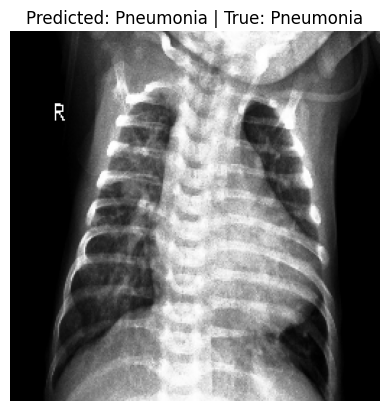

This is a picture of a patient with Pneumonia.


In [121]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

norm = [3, 4, 5, 10, 11, 13, 17, 22, 23, 28, 32, 34, 35, 36, 37, 39, 57, 61, 62]
cov = [2, 7, 8, 9, 15, 16, 24, 25, 26, 30, 38, 40, 41, 42, 46, 47, 48, 49, 53, 55, 56, 58, 60, 63, 64, 65]
pne = [0, 6, 12, 14, 18, 19, 20, 21, 27, 29, 31, 33, 43, 44, 45, 50, 51, 52, 54, 59]
classes = ['Covid', 'Normal', 'Pneumonia']

# Load an image and visualize its prediction
i = np.random.randint(3)
i1, i2, i3 = np.random.randint(len(cov)), np.random.randint(len(norm)), np.random.randint(len(pne))
c_path = f'/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test/Covid/{cov[i1]}.png'
n_path = f'/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test/Normal/{norm[i2]}.png'
p_path = f'/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test/Pneumonia/{pne[i3]}.png'
true_label = 0  
class_labels = ['Covid', 'Normal', 'Pneumonia']

if i == 0: predict_covid(model, c_path)
elif i == 1: predict_normal(model, n_path)
else: predict_pneumonia(model, p_path)

def predict_covid(model, path):
    img = load_img(path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class =np.argmax(prediction)

    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[predicted_class]} | True: {class_labels[0]}')
    plt.axis('off')
    plt.show()
    print(f'This is a picture of a patient with {class_labels[predicted_class]}.')


def predict_normal(model, path):
    img = load_img(path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class =np.argmax(prediction)

    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[predicted_class]} | True: {class_labels[1]}')
    plt.axis('off')
    plt.show()
    print(f'This is a picture of a healthy patient.')

def predict_pneumonia(model, path):
    img = load_img(path, target_size=(256, 256))
    img_array = img_to_array(img) / 255.0  # Rescale to [0, 1]
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    prediction = model.predict(img_array)
    predicted_class =np.argmax(prediction)

    plt.imshow(img)
    plt.title(f'Predicted: {class_labels[predicted_class]} | True: {class_labels[2]}')
    plt.axis('off')
    plt.show()
    print(f'This is a picture of a patient with {class_labels[predicted_class]}.')


In [118]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# confuxion matrix for true positive, true negative, false positive, false negative
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = np.argmax(model.predict(test), axis=1)
y_true = test.classes
c_matrix = confusion_matrix(y_true, y_pred)
print(c_matrix)

# classification report for precision, recall, f1-score
class_report = classification_report(y_true, y_pred, target_names=test.class_indices)
print(class_report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.9231 - loss: 0.1636
Test Loss: 0.16357988119125366
Test Accuracy: 0.9230769276618958
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
[[3 0 2]
 [1 2 1]
 [1 1 2]]
              precision    recall  f1-score   support

       Covid       0.60      0.60      0.60         5
      Normal       0.67      0.50      0.57         4
   Pneumonia       0.40      0.50      0.44         4

    accuracy                           0.54        13
   macro avg       0.56      0.53      0.54        13
weighted avg       0.56      0.54      0.54        13



In [15]:
# 93% accuracy on test, 0.16 loss. Great! But confusion matrix doesn't look great

# trying with 20 epochs
model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 623ms/step - accuracy: 1.0000 - loss: 0.0040 - val_accuracy: 1.0000 - val_loss: 0.0332
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 586ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.0549
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 582ms/step - accuracy: 1.0000 - loss: 0.0012 - val_accuracy: 1.0000 - val_loss: 0.0391
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 484ms/step - accuracy: 1.0000 - loss: 4.5839e-04 - val_accuracy: 1.0000 - val_loss: 0.0487
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 529ms/step - accuracy: 1.0000 - loss: 1.3285e-04 - val_accuracy: 0.9231 - val_loss: 0.0843
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 548ms/step - accuracy: 1.0000 - loss: 2.0291e-04 - val_accuracy: 0.9231 - val_loss: 0.0809
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 596ms/step - accuracy: 1.0000 - loss: 1.5431e-04 - val_accuracy: 1.0000 - val_loss: 0.0761
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 585ms/step - accuracy: 1.0000 - loss: 1.0013e-04 - val_accuracy

In [70]:
# huge range of accuracy: 30-80% on train, 30-00% on test. model is not stable and might be overfitting.

# to fix instability: lowering learning rate to 0.0001 and adding regularization (dropout, l2, batch normalization)
# if this doesn't work, using early stop and increasing batch size

from keras.layers import BatchNormalization
from keras.regularizers import l2
model2 = Sequential()

# convolutional layer 1 with normalization
model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))

# convolutional layer 2 with normalization
model2.add(Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))

# convolutional layer 3 with normalization
model2.add(Conv2D(128, (3, 3), activation='relu', input_shape=(256, 256, 3), kernel_regularizer=keras.regularizers.l2(0.0001)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2, 2))

# flattening to feed into dense layer
model2.add(Flatten())

# dense layer and dropout
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5)) # 50% dropout

# output layer (using softmax instead of sigmoid this time)
model2.add(Dense(3, activation='softmax'))

optimizer = keras.optimizers.Adam(learning_rate=0.0001)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,840,259 (56.61 MB)

 Trainable params: 14,839,811 (56.61 MB)

 Non-trainable params: 448 (1.75 KB)

In [21]:
model.fit(train, validation_data=test, epochs=10)

Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 657ms/step - accuracy: 1.0000 - loss: 2.9704e-05 - val_accuracy: 0.9231 - val_loss: 0.1058
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 637ms/step - accuracy: 1.0000 - loss: 2.0844e-05 - val_accuracy: 0.9231 - val_loss: 0.1025
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 1.0000 - loss: 2.5830e-05 - val_accuracy: 0.9231 - val_loss: 0.1007
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 739ms/step - accuracy: 1.0000 - loss: 1.8172e-05 - val_accuracy: 0.9231 - val_loss: 0.1092
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 731ms/step - accuracy: 1.0000 - loss: 1.8064e-05 - val_accuracy: 0.9231 - val_loss: 0.1071
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 660ms/step - accuracy: 1.0000 - loss: 1.8989e-05 - val_accuracy: 0.9231 - val_loss: 0.1109
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 642ms/step - accuracy: 1.0000 - loss: 1.4590e-05 - val_accuracy: 0.9231 - val_loss: 0.1146
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 626ms/step - accuracy: 1.0000 - loss: 1.6497e-05 - 

In [75]:
# accuracy's looking great! train score: on average between 84-89%, test score: on average between 84-90%

# Evaluate the model on the test set
test_loss, test_accuracy = model2.evaluate(test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# confuxion matrix for true positive, true negative, false positive, false negative
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = np.argmax(model2.predict(test), axis=1)
y_true = test.classes
c_matrix = confusion_matrix(y_true, y_pred)
print(c_matrix)

# classification report for precision, recall, f1-score
class_report = classification_report(y_true, y_pred, target_names=test.class_indices)
print(class_report)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.3077 - loss: 1.1220
Test Loss: 1.122043251991272
Test Accuracy: 0.3076923191547394
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
[[0 5 0]
 [0 4 0]
 [0 4 0]]
              precision    recall  f1-score   support

       Covid       0.00      0.00      0.00         5
      Normal       0.31      1.00      0.47         4
   Pneumonia       0.00      0.00      0.00         4

    accuracy                           0.31        13
   macro avg       0.10      0.33      0.16        13
weighted avg       0.09      0.31      0.14        13



/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


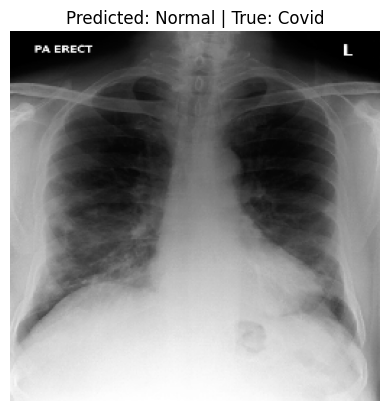

This is a picture of a patient with Normal.


In [90]:
# Load an image and visualize its prediction
i = np.random.randint(3)
i1, i2, i3 = np.random.randint(len(cov)), np.random.randint(len(norm)), np.random.randint(len(pne))
c_path = f'/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test/Covid/{cov[i1]}.png'
n_path = f'/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test/Normal/{norm[i2]}.png'
p_path = f'/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/classification-challenge-starter/Covid19-dataset/test/Pneumonia/{pne[i3]}.png'
true_label = 0  
class_labels = ['Covid', 'Normal', 'Pneumonia']

if i == 0: predict_covid(model2, c_path)
elif i == 1: predict_normal(model2, n_path)
else: predict_pneumonia(model2, p_path)

In [76]:

# to improve model, we can try:
# - adding class weights
# - bootstrapping

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(y_true), 
    y=y_true
)
class_weights = dict(enumerate(class_weights))

class_weights

{0: 0.8666666666666667, 1: 1.0833333333333333, 2: 1.0833333333333333}

In [77]:
accuracies, losses = [], []

for model in models:
    loss, accuracy = model.evaluate(test)
    accuracies.append(accuracy)
    losses.append(loss)

    # get predictions on test data
    y_pred = np.argmax(model.predict(test), axis=1)
    y_true = test.classes

    report = classification_report(y_true, y_pred, target_names=test.class_indices)
    print(report)
print(f'Average Accuracy: {np.mean(accuracies)}')
print(f'Average Loss: {np.mean(losses)}')

NameError: name 'models' is not defined

In [79]:
# confusion matrix and classification report shows all the test data were incorrectly classified as covid-19.

# to improve model, we can try:
# - adding class weights
# - bootstrapping


# training 5 models on bootstrapped augmented data with classweights
from keras.models import clone_model
from sklearn.utils.class_weight import compute_class_weight

models = []

# generate bootstrapped samples of size n
def bootstrap_sample(generator, n):
   while True: # will stop once epochs end
      x_boot, y_boot =[], []
      for i in range(n):
         x, y = next(generator) # aggressive data augmentation
         x_boot.append(x)
         y_boot.append(y)
      x_boot, y_boot = np.concatenate(x_boot), np.concatenate(y_boot)

      random_indices = np.random.choice(len(x_boot), len(x_boot), replace=True) # random bootstrapping with replacement
      yield x_boot[random_indices], y_boot[random_indices]


for i, (x_boot, y_boot) in enumerate(bootstrap_sample(train, 5)):
    print(f'Model {i}')
    model = clone_model(model2)
    optimizer = keras.optimizers.Adam(learning_rate=0.0001)
    class_weights = compute_class_weight( # compute class weights for each bootstrapped sample
    class_weight='balanced', # class weights to improve categorization of minority classes
    classes=np.unique(y_true), 
    y=y_true
   )
    class_weights = dict(enumerate(class_weights))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(x_boot, y_boot, epochs=7, class_weight=class_weights)
    models.append(model)
    if i == 3: break
      

Model 0
Epoch 1/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4691 - loss: 2.2917
Epoch 2/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9357 - loss: 0.2547
Epoch 3/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 956ms/step - accuracy: 0.9642 - loss: 0.1115
Epoch 4/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 989ms/step - accuracy: 0.9845 - loss: 0.2065
Epoch 5/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 940ms/step - accuracy: 0.9951 - loss: 0.0368
Epoch 6/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9830 - loss: 0.1481
Epoch 7/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 912ms/step - accuracy: 0.9729 - loss: 0.1953
Model 1
Epoch 1/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5231 - loss: 3.6796
Epoch 2/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.8964 - loss: 0.8027
Epoch 3/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9494 - loss: 0.1758
Epoch 4/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9615 - loss: 0.1627
Epoch 5/7
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9902 - loss: 0.0977
Epoch 6/7
5/

In [80]:
accuracies, losses = [], []

for model in models:
    loss, accuracy = model.evaluate(test)
    accuracies.append(accuracy)
    losses.append(loss)

    # get predictions on test data
    y_pred = np.argmax(model.predict(test), axis=1)
    y_true = test.classes

    report = classification_report(y_true, y_pred, target_names=test.class_indices)
    #print(report)
print(f'Average Accuracy: {np.mean(accuracies)}')
print(f'Average Loss: {np.mean(losses)}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step - accuracy: 0.3846 - loss: 3.5339
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - accuracy: 0.6154 - loss: 1.0769
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.6154 - loss: 1.9231
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - accuracy: 0.3846 - loss: 2.3324
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
Average Accuracy: 0.5000000149011612
Average Loss: 2.2165912985801697


/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/suprita/Desktop/supriML/xray_classification/classification-challenge/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in